In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [16]:
plt.style.use("cms")

In [4]:
rfile = uproot.open("root://xrootd-cms.infn.it///store/data/Run2016B_ver2/SinglePhoton/NANOAOD/Nano14Dec2018_ver2-v1/90000/490C93A6-FBFF-1F4F-BFAB-6CC18B927912.root")
tree = rfile["Events"]
tree

<TTree b'Events' at 0x7faaa2f52518>

In [50]:
photon_pt = tree.array("Photon_pt")
photon_pt

<JaggedArray [[53.84591] [157.80681 130.09006 26.336536 19.22589 17.475698] [] ... [48.330406] [207.37454] [265.40768]] at 0x7faab8f86080>

In [51]:
lead_photon_pt = photon_pt[photon_pt.counts>0][:,0]
lead_photon_pt

array([ 53.84591 , 157.80681 ,  42.734604, ...,  48.330406, 207.37454 ,
       265.40768 ], dtype=float32)

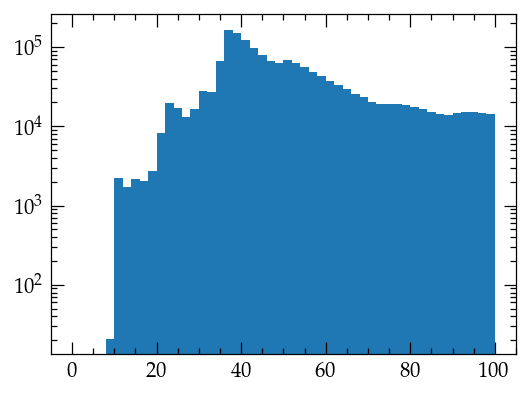

In [22]:
fig, ax = plt.subplots()
ax.hist(lead_photon_pt, bins=np.linspace(0., 100., 51))
ax.set_yscale('log')
pass

In [24]:
photon_vidmap = tree.array("Photon_vidNestedWPBitmap")
photon_vidmap

<JaggedArray [[16383] [3135 14335 15375 2111 3103] [] ... [13311] [15423] [3135]] at 0x7faad0ef5438>

In [27]:
lead_photon_vidmap = photon_vidmap[photon_vidmap.counts>0][:,0]
lead_photon_vidmap

array([16383,  3135, 15615, ..., 13311, 15423,  3135], dtype=int32)

In [163]:
i=6
print((1<<(2*i)) + (1<<(2*i+1)))
print(2*i)

12288
12


In [129]:
cuts = [
    (photon_vidmap & ((1<<2*i)+(1<<2*i+1)))>>2*i
    for i in range(7)
]

In [112]:
photon_sieie = tree.array("Photon_sieie")
photon_sieie

<JaggedArray [[0.0093688965] [0.014656067 0.024383545 0.038085938 0.0103302 0.041381836] [] ... [0.025283813] [0.010566711] [0.011962891]] at 0x7faab8ed00b8>

In [153]:
photon_chiso = tree.array("Photon_pfRelIso03_chg")
photon_chiso

<JaggedArray [[0.0] [0.34780902 0.0 1.2200705 0.9055693 1.7458336] [] ... [0.0] [0.07798608] [0.12614118]] at 0x7faa7b54c6a0>

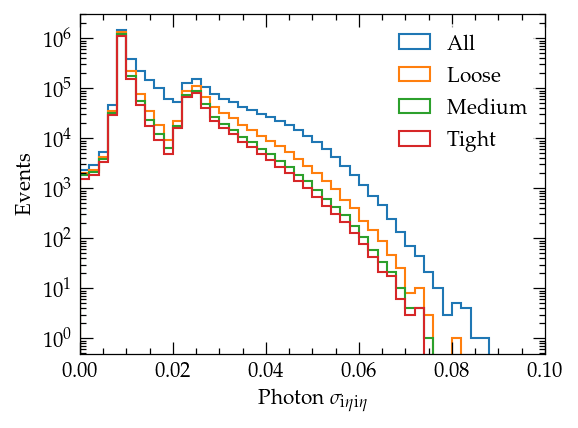

In [145]:
fig, ax = plt.subplots()
ax.hist(photon_sieie[(cuts[0]>=0) & (cuts[1]>=0) & (cuts[2]>=0) & (cuts[5]>=0) & (cuts[6]>=0)].content, bins=np.linspace(0., 0.1, 51), histtype='step', label="All")
ax.hist(photon_sieie[(cuts[0]>=1) & (cuts[1]>=1) & (cuts[2]>=1) & (cuts[5]>=1) & (cuts[6]>=1)].content, bins=np.linspace(0., 0.1, 51), histtype='step', label="Loose")
ax.hist(photon_sieie[(cuts[0]>=2) & (cuts[1]>=2) & (cuts[2]>=2) & (cuts[5]>=2) & (cuts[6]>=2)].content, bins=np.linspace(0., 0.1, 51), histtype='step', label="Medium")
ax.hist(photon_sieie[(cuts[0]>=3) & (cuts[1]>=3) & (cuts[2]>=3) & (cuts[5]>=3) & (cuts[6]>=3)].content, bins=np.linspace(0., 0.1, 51), histtype='step', label="Tight")
ax.legend()
ax.set_xlim(0., 0.1)
ax.set_yscale('log')
ax.set_ylabel("Events")
ax.set_xlabel(r'Photon $\sigma_{\mathrm{i}\eta\mathrm{i}\eta}$')
pass

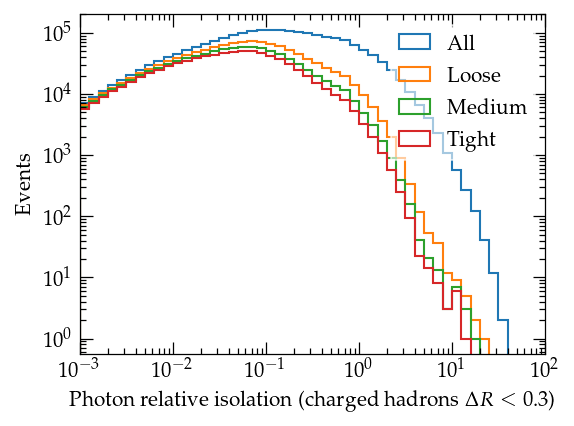

In [157]:
fig, ax = plt.subplots()
ax.hist(photon_chiso[(cuts[0]>=0) & (cuts[1]>=0) & (cuts[2]>=0) & (cuts[5]>=0) & (cuts[6]>=0)].content, bins=np.logspace(-3, 2, 51), histtype='step', label="All")
ax.hist(photon_chiso[(cuts[0]>=1) & (cuts[1]>=1) & (cuts[2]>=1) & (cuts[5]>=1) & (cuts[6]>=1)].content, bins=np.logspace(-3, 2, 51), histtype='step', label="Loose")
ax.hist(photon_chiso[(cuts[0]>=2) & (cuts[1]>=2) & (cuts[2]>=2) & (cuts[5]>=2) & (cuts[6]>=2)].content, bins=np.logspace(-3, 2, 51), histtype='step', label="Medium")
ax.hist(photon_chiso[(cuts[0]>=3) & (cuts[1]>=3) & (cuts[2]>=3) & (cuts[5]>=3) & (cuts[6]>=3)].content, bins=np.logspace(-3, 2, 51), histtype='step', label="Tight")
ax.legend()
ax.set_xlim(0.001, 100.)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Events")
ax.set_xlabel(r'Photon relative isolation (charged hadrons $\Delta R<0.3$)')
pass